Sınavlardaki performans cinsiyete, kökene ve anne-baba eğitim durumuna göre değişiklik göstermekte midir?

Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı? Varsa bunu nasıl açıklayabilirsiniz?

Hazırlık kurslarının sonav performansı üzerinde bir etkisi var mı?

Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [2]:
ogrenciler = pd.read_csv("StudentsPerformance.csv")
ogrenciler.columns = ['cinsiyet', 'koken', 'aile_egt_seviyesi', 'ogle_yemegi', 
                              'hazirlik_kursu', 'matematik_notu', 'okuma_notu', 'yazma_notu']
ogrenciler.head()

,cinsiyet,koken,aile_egt_seviyesi,ogle_yemegi,hazirlik_kursu,matematik_notu,okuma_notu,yazma_notu
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
ogrenciler.groupby('cinsiyet').mean()

,matematik_notu,okuma_notu,yazma_notu
cinsiyet,,,
female,63.633,72.608,72.467
male,68.728,65.473,63.311


In [10]:
ogrenciler.groupby('koken').mean()

,matematik_notu,okuma_notu,yazma_notu
koken,,,
group A,61.629,64.674,62.674
group B,63.453,67.353,65.600
group C,64.464,69.103,67.828
group D,67.363,70.031,70.145
group E,73.821,73.029,71.407


In [4]:
ogrenciler.groupby('aile_egt_seviyesi').mean()

,matematik_notu,okuma_notu,yazma_notu
aile_egt_seviyesi,,,
associate's degree,67.883,70.928,69.896
bachelor's degree,69.390,73.000,73.381
high school,62.138,64.704,62.449
master's degree,69.746,75.373,75.678
some college,67.128,69.460,68.841
some high school,63.497,66.939,64.888


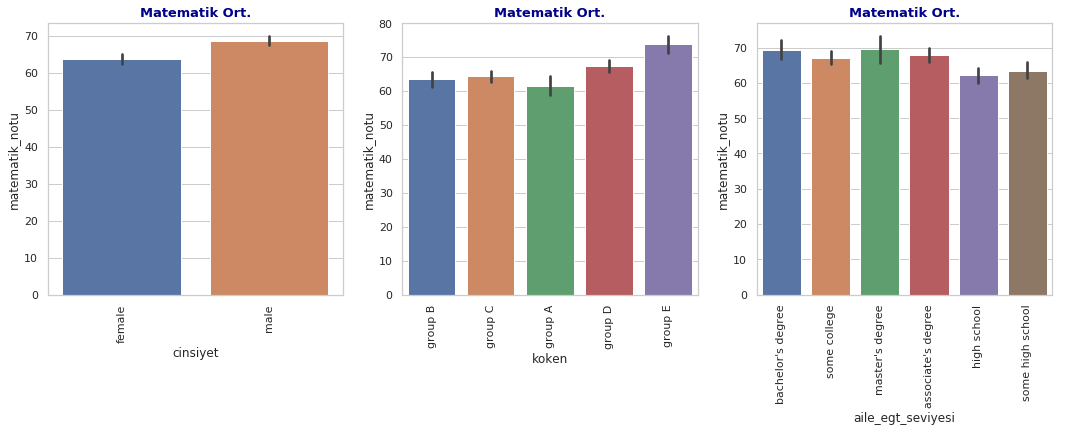

In [5]:
baslik_font = {'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size' : 13}
eksen_font = {'family':'arial', 'color':'darkred', 'weight' : 'bold', 'size':10}

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(ogrenciler["cinsiyet"], ogrenciler["matematik_notu"])
plt.title("Matematik Ort.", fontdict = baslik_font)
plt.xticks(rotation='vertical')

plt.subplot(1,3,2)
sns.barplot(ogrenciler["koken"], ogrenciler["matematik_notu"])
plt.title("Matematik Ort.", fontdict = baslik_font)
plt.xticks(rotation='vertical')

plt.subplot(1,3,3)
sns.barplot(ogrenciler["aile_egt_seviyesi"], ogrenciler["matematik_notu"])
plt.title("Matematik Ort.", fontdict = baslik_font)
plt.xticks(rotation='vertical')
plt.show() 

Aile eğitim seviyesi arttıkça notlar artmaktadır.
Cinsiyet ve kökene göre de notlar değişmektedir.

In [17]:
#Öğle yemek tipinin sınav performansları ile bir ilişkisi var mı?

ogrenciler.groupby('ogle_yemegi').mean()

,matematik_notu,okuma_notu,yazma_notu
ogle_yemegi,,,
free/reduced,58.921,64.654,63.023
standard,70.034,71.654,70.823


Ortalama sonucunda öğle yemeği alan öğrencilerin not ortalamaları daha yüksektir.

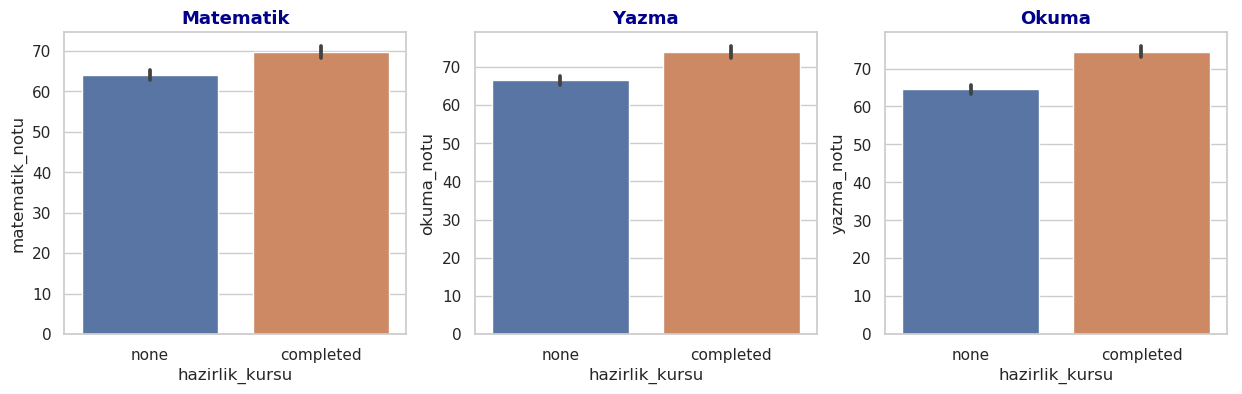

In [27]:
#Hazırlık kurslarnın etkileri

plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
sns.barplot(ogrenciler['hazirlik_kursu'], ogrenciler['matematik_notu'])
plt.title('Matematik', fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(ogrenciler['hazirlik_kursu'], ogrenciler['okuma_notu'])
plt.title('Yazma', fontdict = baslik_font)

plt.subplot(1,3,3)
sns.barplot(ogrenciler['hazirlik_kursu'], ogrenciler['yazma_notu'])
plt.title('Okuma', fontdict = baslik_font)
plt.show()

Hazırlık kursu alan öğrenciler bütün derslerde daha başarılı olmuşlar.

In [28]:
#Birbiriyle korelasyonu en fazla olan dersler hangisidir?

In [29]:
ogrenciler.corr()

,matematik_notu,okuma_notu,yazma_notu
matematik_notu,1.000,0.818,0.803
okuma_notu,0.818,1.000,0.955
yazma_notu,0.803,0.955,1.000


Okuma ve yazma kolerasyonu en yüksek olandır.